In [2]:

%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split


# Partial Dependence Plots

In [2]:
bike_day_df_raws = pd.read_csv('./bsd/day.csv')
bike_day_df_raws.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Keep only some features
df = bike_day_df_raws[["temp", "hum", "windspeed", "cnt"]]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :3], # train for first 3 variables
                                                    df.iloc[:, 3], # test is the last variable
                                                    test_size=0.2, # 20% for testing
                                                    random_state = 123)

# Fit model by default
model = GradientBoostingRegressor(random_state = 123)
model.fit(X_train, y_train)

# Evaluate model using R squared
score = model.score(X_test, y_test)
score

0.45235313872881266

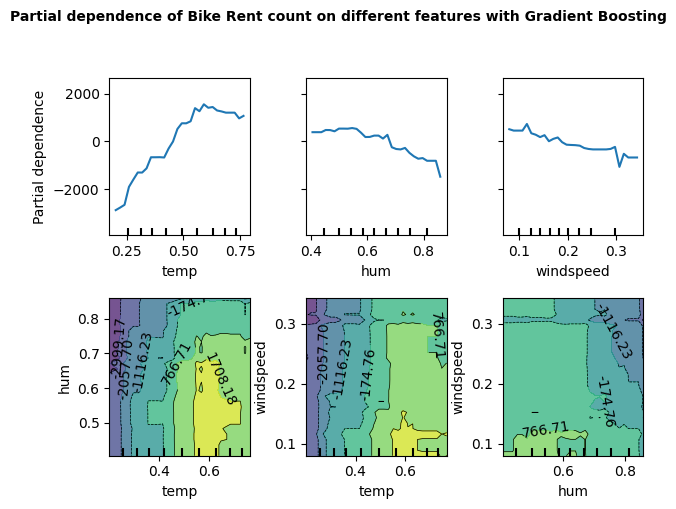

In [4]:
# Create the partial dependence display
pdp = PartialDependenceDisplay.from_estimator(model, 
                                              X_train, 
                                              features = ["temp", "hum", "windspeed", 
                                                          ("temp", "hum"), ("temp", "windspeed"), ("hum", "windspeed")], 
                                              #kind="both", 
                                              grid_resolution=30)

# Adjust the subplots spacing
pdp.figure_.subplots_adjust(wspace=0.4, hspace=0.4)

# Set the suptitle
plt.suptitle("Partial dependence of Bike Rent count on different features with Gradient Boosting", y=1.05, fontsize=10, fontweight='bold')

# Tighten the layout
plt.tight_layout()

In [5]:
# ! pip install pycebox

In [6]:
X_test

,temp,hum,windspeed
488,0.560000,0.768333,0.133696
421,0.279167,0.410000,0.205229
91,0.315000,0.653750,0.197146
300,0.330833,0.585833,0.229479
177,0.682500,0.658333,0.107588
...,...,...,...
631,0.529167,0.467083,0.223258
548,0.781667,0.447083,0.195267
439,0.557500,0.579583,0.149883
449,0.437500,0.880833,0.220775


In [7]:
from pycebox.ice import ice, ice_plot
ice_df = ice(X_test, 'temp', model.predict)


/Users/lucianosanchez/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


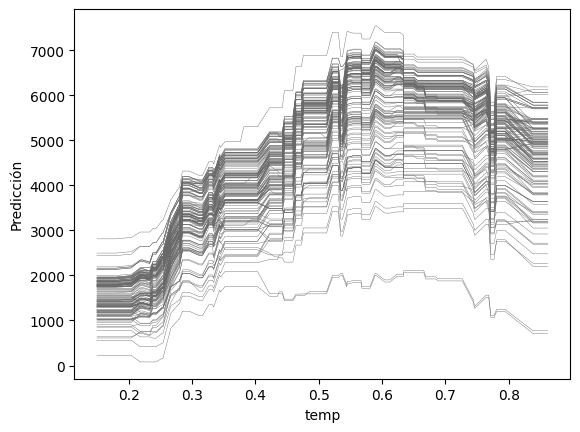

In [8]:
ice_plot(ice_df,c='dimgray', linewidth=0.3)
plt.ylabel('Predicción')
plt.xlabel('temp');

# LIME para clasificación de imágenes

In [9]:
# ! pip install scikit-image

In [10]:
import os
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import skimage

In [11]:
# ! pip install lime

In [12]:
import lime
from lime import lime_image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
import numpy as np

In [13]:
# Load and preprocess the image
image_path = './bsd/Dog_cat_1.png'  
# image_path = './bsd/Dog_cat_2.jpg'  
img = image.load_img(image_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

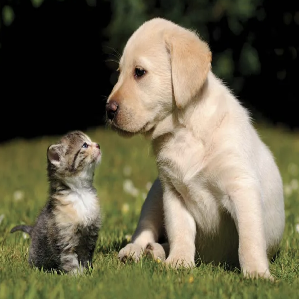

In [14]:
img

In [15]:
# Clasificador de imágenes preentrenado

inet_model = InceptionV3()


In [16]:
def load_imagenet_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
    return labels

# Example usage
file_path = './bsd/imagenet1000_clsidx_to_labels.txt'
imagenet_labels = load_imagenet_labels(file_path)

In [17]:
# Función que toma una imagen y produce las probabilidades de que pertenezca a cada clase

explainer = lime_image.LimeImageExplainer()
def predict_fn(images):
    return inet_model.predict(images)

In [18]:
# Se le pasa una imagen, el color que se le pone a los pixeles cuando se ocultan, y el número de muestras
# perturbadas que se generan para evaluar cómo cambia el clasificador cuando se ocultan puntos

explanation = explainer.explain_instance(x[0], 
                                         predict_fn, 
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
[imagenet_labels[i] for i in explanation.top_labels]

["208: 'Labrador retriever',",
 "207: 'golden retriever',",
 "216: 'clumber, clumber spaniel',",
 "215: 'Brittany spaniel',",
 "852: 'tennis ball',"]

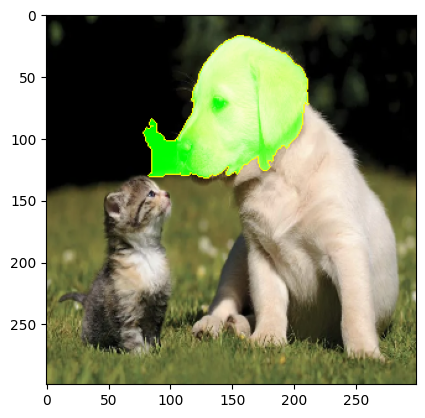

In [20]:
# Muestra las regiones que más contribuyen a la primera predicción

from skimage.segmentation import mark_boundaries

# Display the explanation using matplotlib
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=5, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

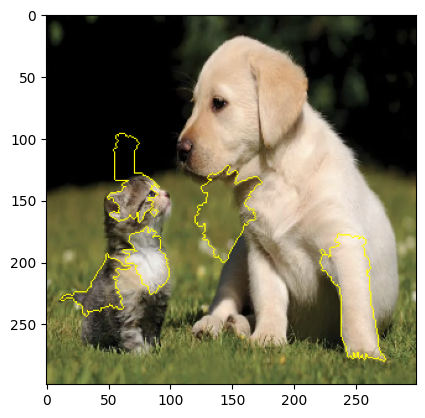

In [21]:
# Muestra las regiones que más se oponen a la primera predicción

from skimage.segmentation import mark_boundaries

# Display the explanation using matplotlib
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False,
                                            negative_only=True, 
                                            num_features=5, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

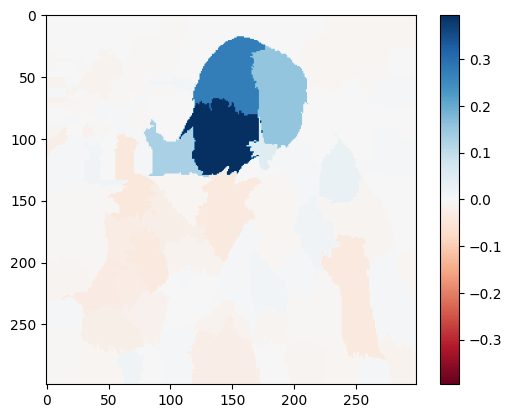

In [22]:
ind = explanation.top_labels[0]

dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin= -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [23]:
X_train.columns.values.tolist()

['temp', 'hum', 'windspeed']

# Lime para datos tabulares

In [3]:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular

# Cargar el conjunto de datos Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train.values, y_train)

# Crear un explainer de LIME para datos tabulares
explainer = lime_tabular.LimeTabularExplainer(X_train.values, 
                                              feature_names=X_train.columns, 
                                              class_names=data.target_names, 
                                              mode='classification')

# Seleccionar una instancia para explicar
i = 1

# Explicar la instancia
exp = explainer.explain_instance(X_test.iloc[i].values, clf.predict_proba, num_features=4, labels=[0,1,2])




In [4]:
print("Predicción del modelo para la instancia:", data.target_names[clf.predict([X_test.iloc[i].values])[0]])

Predicción del modelo para la instancia: setosa


In [5]:
clf.predict_proba(X_test.iloc[i].values.reshape(1, -1))

array([[0.94, 0.06, 0.  ]])

In [6]:
# Mostrar la explicación
exp.show_in_notebook(show_table=True)

ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Python313\Lib\site-packages\IPython\core\display.py)

In [7]:
X_test.iloc[i]

sepal length (cm)    5.7
sepal width (cm)     3.8
petal length (cm)    1.7
petal width (cm)     0.3
Name: 18, dtype: float64

In [8]:
exp.as_list()

[('1.60 < petal length (cm) <= 4.30', 0.24457708900213887),
 ('petal width (cm) <= 0.30', -0.2116769788744396),
 ('5.10 < sepal length (cm) <= 5.80', 0.035576316521632005),
 ('sepal width (cm) > 3.30', 0.0072055074538707395)]

# SHAP

In [30]:
# ! pip install shap

In [31]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[i,:,0], X_test.iloc[i].values, feature_names=data.feature_names)



In [32]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[i,:,1], X_test.iloc[i].values, feature_names=data.feature_names)

In [33]:
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[i,:,2], X_test.iloc[i].values, feature_names=data.feature_names)

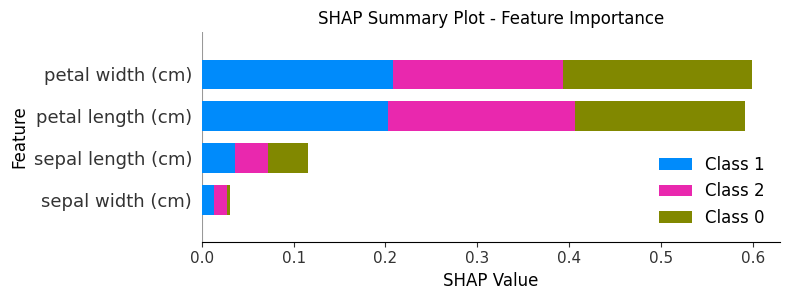

In [34]:
# Create a summary plot with the bar plot type
shap_values = explainer.shap_values(X_train)

# Bug en paquete shap, setiembre 2024
ensured_list_shap_values = [shap_values[:,:,i] for i in range(shap_values.shape[2])]
shap.summary_plot(ensured_list_shap_values, X_train, plot_type='bar', show=False)

# explainer = shap.Explainer(clf)
# shap_values = explainer(X_test)
# ax = shap.plots.bar(shap_values[:,:,0],show=False)


# Customize the plot appearance
plt.title("SHAP Summary Plot - Feature Importance")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [9]:
explainer_a = shap.Explainer(clf)
shap_values_cat = explainer_a(X_test)

NameError: name 'shap' is not defined

In [36]:
shap_values_cat.shape

(38, 4, 3)

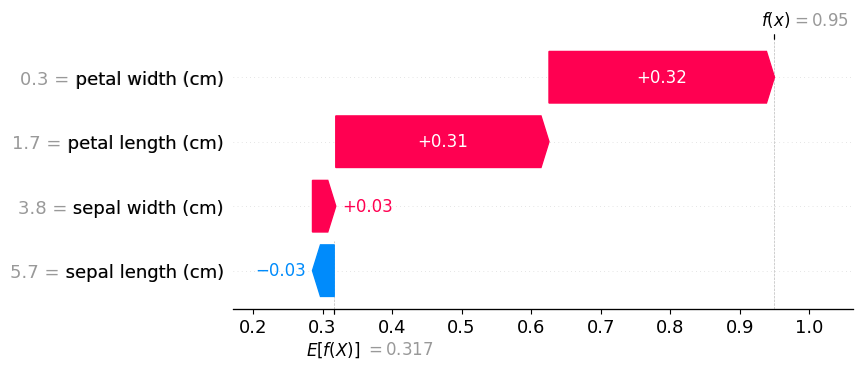

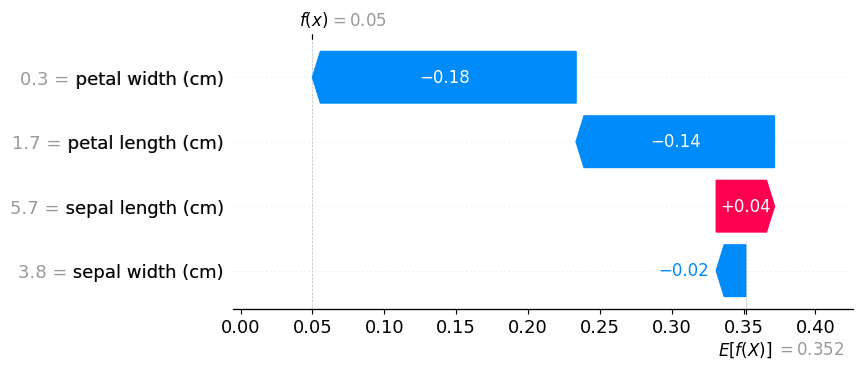

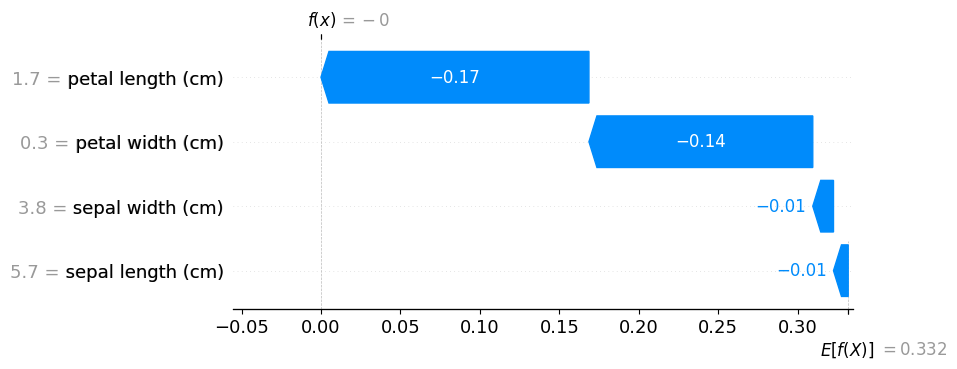

In [37]:
shap.plots.waterfall(shap_values_cat[i,:,0])
shap.plots.waterfall(shap_values_cat[i,:,1])
shap.plots.waterfall(shap_values_cat[i,:,2])

In [38]:
data = pd.read_csv('./bsd/breast-cancer-wisconsin.data', header=None)
data.columns=['Id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data2 = data.apply(pd.to_numeric, errors='coerce') #Convert argument to numeric type and invalid parsing is set as NaN
data = data2.dropna() #Rewrrite previous data entry with new complete data 

#Patient Number is not required
del data['Id number']

# Display the first few records
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [39]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :9], # train for first 3 variables
                                                    data.iloc[:, 9], # test is the last variable
                                                    test_size=0.2, # 20% for testing
                                                    random_state = 123)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
print(f"Score: {clf.score(X_test, y_test)}")

Score: 0.9781021897810219
